 
# PleioPred

In this notebook, we will use PleioPred to calculate the PRS.

**Note:** PleioPred requires Python 2.0.

## Download the Repository

Clone the PleioPred repository using Git:

```bash
git clone https://github.com/yiminghu/PleioPred.git
```

### Annotation Data

PleioPred requires functional annotation information for the prediction and uses two GWAS datasets for related diseases.

To download the annotation data:

OR use the following Google Drive link. There are two files:
- `AnnoPred_ref.tar.gz`
- `AnnoPred_ref1.0.tar.gz`

[Google Drive Link](https://drive.google.com/drive/u/1/folders/1mwvCiLxewH6M_MrnD-ZUih5T93-JQpaT)

```bash
cd PleioPred
wget http://genocanyon.med.yale.edu/AnnoPredFiles/AnnoPred_ref.tar.gz
```
 

Extract the downloaded file:

```bash
tar -zxvf AnnoPred_ref.tar.gz
```

This step will generate a folder named `ref` containing functional annotations.

### LDSC Installation

PleioPred also requires LDSC. Download it using:

```bash
cd PleioPred
git clone https://github.com/bulik/ldsc
```

After cloning, you should have the following directory structure:

```
AnnoPred_ref.tar.gz  ldsc  LDSC.config  LICENSE  pleiopred  PleioPred.py  README.md  ref  temp  test_data
```



Once these steps are complete, copy the all files in PleioPred folder to the working directory/

```bash
cd PleioPred/

cp * ../
```



Open `LDSC.config` and paste the path to LDSC in it:

```bash
cat LDSC.config
# LDSCPath /data/ascher01/uqmmune1/BenchmarkingPGSTools/ldsc
OR
# LDSCPath workingdirectory/ldsc

```
 
## PleioPred Hyperparameters

1. PleioPred uses joint modeling of multiple diseases and functional annotation for prediction.
2. For simplicity, we considered the first GWAS (GWAS1) and the second GWAS (GWAS2) to be the same, but GWAS2 is always related to the phenotype being predicted in GWAS1.
3. You can pass values for:
   - `-rho RHO`
   - `--alpha ALPHA`
   - `--num_iter`
   - `--burn_in BURN_IN`
   - `--ld_radius LD_RADIUS`
   
   in the command below, but we used the default values, as including all hyperparameters is computationally expensive for this tool.

   ```python
   command = [
       "python",
       "PleioPred.py",
       "--sumstats_D1", filedirec + os.sep + filedirec + ".PleioPred",
       "--sumstats_D2", filedirec + os.sep + filedirec + ".PleioPred",

       # Specify the number of cases and controls for both GWAS.
       # Default numbers are used here.
       # For continuous phenotypes, consider an equal number of cases and controls.
       "--N_case1", str(1000),
       "--N_ctrl1", str(1000),
       "--N_case2", str(1000),
       "--N_ctrl2", str(1000),

       "--ref_gt", traindirec + os.sep + trainfilename,
       "--val_gt", traindirec + os.sep + trainfilename,
       # The training and validation data is the same as the genotype data.

       "--coord_D1", traindirec + os.sep + "PleioPred_tmp_test/coord_out1",
       "--coord_D2", traindirec + os.sep + "PleioPred_tmp_test/coord_out1",
       "--temp_dir", traindirec + os.sep + "PleioPred_tmp_test/",

       "--local_ld_prefix", traindirec + os.sep + "PleioPred_tmp_test/test",
       "--out_anno", traindirec + os.sep + "PleioPred_tmp_test/test_pleiopred_anno",
       "--out_ld", traindirec + os.sep + "PleioPred_tmp_test/test_pleiopred"
   ]
   print(" ".join(command))
   subprocess.call(command)
   ```

4. We considered the same number of cases and controls, but you need to pass the actual cases and controls for both GWAS in the data.

 
 
#### Optional Arguments

| Argument                               | Description                                                      |
|----------------------------------------|------------------------------------------------------------------|
| `-h, --help`                          | Show this help message and exit.                               |
| `--sumstats_D1 SUMSTATS_D1`          | GWAS summary stats of Disease 1.                               |
| `--sumstats_D2 SUMSTATS_D2`          | GWAS summary stats of Disease 2.                               |
| `--ref_gt REF_GT`                     | Reference genotype, Plink bed format.                          |
| `--val_gt VAL_GT`                     | Validation genotype, Plink bed format.                         |
| `--N_case1 N_CASE1`                   | Number of cases in GWAS training of D1, for LDSC.             |
| `--N_ctrl1 N_CTRL1`                   | Number of controls in GWAS training of D1, for LDSC.          |
| `--N_case2 N_CASE2`                   | Number of cases in GWAS training of D2, for LDSC.             |
| `--N_ctrl2 N_CTRL2`                   | Number of controls in GWAS training of D2, for LDSC.          |
| `--temp_dir TEMP_DIR`                 | Directory to output all temporary files. Defaults to current directory. |
| `--rho RHO`                           | Tuning parameter in (-1, 1), the genetic correlation between diseases. |
| `--alpha ALPHA`                       | Hyperparameter for the prior of PV, default 1,1,1,1.          |
| `--init_PV INIT_PV`                  | Hyperparameter for the prior of PV, default [0.25, 0.25, 0.25, 0.25]. |
| `--zero_jump_prob ZERO_JUMP_PROB`    | Shrinkage level, default 0.                                    |
| `--num_iter NUM_ITER`                 | Number of iterations for MCMC, default to 250.                |
| `--burn_in BURN_IN`                   | Burn-in for MCMC, default to 100.                              |
| `--local_ld_prefix LOCAL_LD_PREFIX`   | A local LD file name prefix; will be created if not present.  |
| `--ld_radius LD_RADIUS`                | If not provided, will use the number of SNPs in common divided by 3000. |
| `--coord_D1 COORD_D1`                 | Output H5 File for coord_genotypes of D1; generated if not existing. |
| `--coord_D2 COORD_D2`                 | Output H5 File for coord_genotypes of D2; generated if not existing. |
| `--out_anno OUT_ANNO`                 | Output filename prefix for PleioPred-anno.                     |
| `--out_ld OUT_LD`                     | Output filename prefix for PleioPred.                          |
| `--user_h1 USER_H1`                   | User-provided heritability estimation for D1.                  |
| `--user_h2 USER_H2`                   | User-provided heritability estimation for D2.                  |
```

## GWAS file processing for PleioPred

PleioPred will automatically convert the OR to log or or betas for the continous phenotype so we saved the file as contianing OR ratio only. 


In [1]:
import os
import pandas as pd
import numpy as np
import sys

#filedirec = sys.argv[1]

filedirec = "SampleData1"
#filedirec = "asthma_19"
#filedirec = "migraine_0"

def check_phenotype_is_binary_or_continous(filedirec):
    # Read the processed quality controlled file for a phenotype
    df = pd.read_csv(filedirec+os.sep+filedirec+'_QC.fam',sep="\s+",header=None)
    column_values = df[5].unique()
 
    if len(set(column_values)) == 2:
        return "Binary"
    else:
        return "Continous"



# Read the GWAS file.
GWAS = filedirec + os.sep + filedirec+".gz"
df = pd.read_csv(GWAS,compression= "gzip",sep="\s+")

Numberofsamples = df["N"].mean()


 
if "BETA" in df.columns.to_list():
    # For Binary Phenotypes.
    df["OR"] = np.exp(df["BETA"])
    df = df[['CHR', 'BP', 'SNP', 'A1', 'A2', 'N', 'SE', 'P', 'OR', 'INFO', 'MAF']]

else:
    # For Binary Phenotype.
    df = df[['CHR', 'BP', 'SNP', 'A1', 'A2', 'N', 'SE', 'P', 'OR', 'INFO', 'MAF']]

column_mapping = {"CHR": "hg19chrc", "SNP": "snpid", "A1": "a1", "A2": "a2", "BP": "bp", "OR": "or", "P": "p"}
new_columns = ["hg19chrc", "snpid", "a1", "a2", "bp", "or", "p"]
transformed_df = df.rename(columns=column_mapping)[new_columns]
transformed_df['hg19chrc'] = transformed_df['hg19chrc'].apply(lambda x: "chr" + str(x))
print(transformed_df.head())
 
    

 
  


transformed_df.to_csv(filedirec + os.sep +filedirec+".PleioPred",sep="\t",index=False)
print(transformed_df.head())
print("Length of DataFrame!",len(transformed_df))


  hg19chrc       snpid a1 a2      bp        or         p
0     chr1   rs3131962  A  G  756604  0.997887  0.483171
1     chr1  rs12562034  A  G  768448  1.000687  0.834808
2     chr1   rs4040617  G  A  779322  0.997604  0.428970
3     chr1  rs79373928  G  T  801536  1.002036  0.808999
4     chr1  rs11240779  G  A  808631  1.001308  0.590265
  hg19chrc       snpid a1 a2      bp        or         p
0     chr1   rs3131962  A  G  756604  0.997887  0.483171
1     chr1  rs12562034  A  G  768448  1.000687  0.834808
2     chr1   rs4040617  G  A  779322  0.997604  0.428970
3     chr1  rs79373928  G  T  801536  1.002036  0.808999
4     chr1  rs11240779  G  A  808631  1.001308  0.590265
('Length of DataFrame!', 499617)


### Define Hyperparameters

Define hyperparameters to be optimized and set initial values.

### Extract Valid SNPs from Clumped File

For Windows, download `gwak`, and for Linux, the `awk` command is sufficient. For Windows, `GWAK` is required. You can download it from [here](https://sourceforge.net/projects/gnuwin32/). Get it and place it in the same directory.


### Execution Path

At this stage, we have the genotype training data `newtrainfilename = "train_data.QC"` and genotype test data `newtestfilename = "test_data.QC"`.

We modified the following variables:

1. `filedirec = "SampleData1"` or `filedirec = sys.argv[1]`
2. `foldnumber = "0"` or `foldnumber = sys.argv[2]` for HPC.

Only these two variables can be modified to execute the code for specific data and specific folds. Though the code can be executed separately for each fold on HPC and separately for each dataset, it is recommended to execute it for multiple diseases and one fold at a time.
Here’s the corrected text in Markdown format:

 
### P-values

PRS calculation relies on P-values. SNPs with low P-values, indicating a high degree of association with a specific trait, are considered for calculation.

You can modify the code below to consider a specific set of P-values and save the file in the same format.

We considered the following parameters:

- **Minimum P-value**: `1e-10`
- **Maximum P-value**: `1.0`
- **Minimum exponent**: `10`  (Minimum P-value in exponent)
- **Number of intervals**: `100`  (Number of intervals to be considered)

The code generates an array of logarithmically spaced P-values:

```python
import numpy as np
import os

minimumpvalue = 10  # Minimum exponent for P-values
numberofintervals = 100  # Number of intervals to be considered

allpvalues = np.logspace(-minimumpvalue, 0, numberofintervals, endpoint=True)  # Generating an array of logarithmically spaced P-values

print("Minimum P-value:", allpvalues[0])
print("Maximum P-value:", allpvalues[-1])

count = 1
with open(os.path.join(folddirec, 'range_list'), 'w') as file:
    for value in allpvalues:
        file.write(f'pv_{value} 0 {value}\n')  # Writing range information to the 'range_list' file
        count += 1

pvaluefile = os.path.join(folddirec, 'range_list')
```

In this code:
- `minimumpvalue` defines the minimum exponent for P-values.
- `numberofintervals` specifies how many intervals to consider.
- `allpvalues` generates an array of P-values spaced logarithmically.
- The script writes these P-values to a file named `range_list` in the specified directory.
 

In [2]:
from operator import index
import pandas as pd
import numpy as np
import os
import subprocess
import sys
import pandas as pd
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import roc_auc_score, confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar

def create_directory(directory):
    """Function to create a directory if it doesn't exist."""
    if not os.path.exists(directory):  # Checking if the directory doesn't exist
        os.makedirs(directory)  # Creating the directory if it doesn't exist
    return directory  # Returning the created or existing directory

 
#foldnumber = sys.argv[1]
foldnumber = "0"  # Setting 'foldnumber' to "0"

folddirec = filedirec + os.sep + "Fold_" + foldnumber  # Creating a directory path for the specific fold
trainfilename = "train_data"  # Setting the name of the training data file
newtrainfilename = "train_data.QC"  # Setting the name of the new training data file

testfilename = "test_data"  # Setting the name of the test data file
newtestfilename = "test_data.QC"  # Setting the name of the new test data file

# Number of PCA to be included as a covariate.
numberofpca = ["6"]  # Setting the number of PCA components to be included

# Clumping parameters.
clump_p1 = [1]  # List containing clump parameter 'p1'
clump_r2 = [0.1]  # List containing clump parameter 'r2'
clump_kb = [200]  # List containing clump parameter 'kb'

# Pruning parameters.
p_window_size = [200]  # List containing pruning parameter 'window_size'
p_slide_size = [50]  # List containing pruning parameter 'slide_size'
p_LD_threshold = [0.25]  # List containing pruning parameter 'LD_threshold'

# Kindly note that the number of p-values to be considered varies, and the actual p-value depends on the dataset as well.
# We will specify the range list here.
#folddirec = "/path/to/your/folder"  # Replace with your actual folder path
from decimal import Decimal, getcontext
import numpy as np

# Set precision to a high value (e.g., 50)
getcontext().prec = 50
minimumpvalue = 10  # Minimum p-value in exponent
numberofintervals = 20  # Number of intervals to be considered
allpvalues = np.logspace(-minimumpvalue, 0, numberofintervals, endpoint=True)  # Generating an array of logarithmically spaced p-values
count = 1
with open(os.path.join(folddirec, 'range_list'), 'w') as file:
    for value in allpvalues:
        
        file.write('pv_{} 0 {}\n'.format(value, value))  # Writing range information to the 'range_list' file
        count = count + 1

pvaluefile = folddirec + os.sep + 'range_list'

# Initializing an empty DataFrame with specified column names
prs_result = pd.DataFrame(columns=["clump_p1", "clump_r2", "clump_kb", "p_window_size", "p_slide_size", "p_LD_threshold",
                                   "pvalue","datafile", "numberofpca","Train_pure_prs", "Train_null_model", "Train_best_model",
                                   "Test_pure_prs", "Test_null_model", "Test_best_model"])


### Define Helper Functions

1. **Perform Clumping and Pruning**
2. **Calculate PCA Using Plink**
3. **Fit Binary Phenotype and Save Results**
4. **Fit Continuous Phenotype and Save Results**


In [3]:
import os
import subprocess
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import explained_variance_score

def perform_clumping_and_pruning_on_individual_data(traindirec, newtrainfilename,numberofpca, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile):
    
    command = [
    "./plink",
    "--bfile", traindirec+os.sep+newtrainfilename,
    "--indep-pairwise", p1_val, p2_val, p3_val,
    "--out", traindirec+os.sep+trainfilename
    ]
    subprocess.call(command)
    # First perform pruning and then clumping and the pruning.

    command = [
    "./plink",
    "--bfile", traindirec+os.sep+newtrainfilename,
    "--clump-p1", c1_val,
    "--extract", traindirec+os.sep+trainfilename+".prune.in",
    "--clump-r2", c2_val,
    "--clump-kb", c3_val,
    "--clump", filedirec+os.sep+filedirec+".txt",
    "--clump-snp-field", "SNP",
    "--clump-field", "P",
    "--out", traindirec+os.sep+trainfilename
    ]    
    subprocess.call(command)

    # Extract the valid SNPs from th clumped file.
    # For windows download gwak for linux awk commmand is sufficient.
    ### For windows require GWAK.
    ### https://sourceforge.net/projects/gnuwin32/
    ##3 Get it and place it in the same direc.
    #os.system("gawk "+"\""+"NR!=1{print $3}"+"\"  "+ traindirec+os.sep+trainfilename+".clumped >  "+traindirec+os.sep+trainfilename+".valid.snp")
    #print("gawk "+"\""+"NR!=1{print $3}"+"\"  "+ traindirec+os.sep+trainfilename+".clumped >  "+traindirec+os.sep+trainfilename+".valid.snp")

    #Linux:
    #Linux:
    command = "awk 'NR!=1{{print $3}}' {}{}{}.clumped > {}{}{}.valid.snp".format(
        traindirec, os.sep, trainfilename, 
        traindirec, os.sep, trainfilename
    )
 
    os.system(command)
    
    
    command = [
    "./plink",
    "--make-bed",
    "--bfile", traindirec+os.sep+newtrainfilename,
    "--indep-pairwise", p1_val, p2_val, p3_val,
    "--extract", traindirec+os.sep+trainfilename+".valid.snp",
    "--out", traindirec+os.sep+newtrainfilename+".clumped.pruned"
    ]
    subprocess.call(command)
    
    command = [
    "./plink",
    "--make-bed",
    "--bfile", traindirec+os.sep+testfilename,
    "--indep-pairwise", p1_val, p2_val, p3_val,
    "--extract", traindirec+os.sep+trainfilename+".valid.snp",
    "--out", traindirec+os.sep+testfilename+".clumped.pruned"
    ]
    subprocess.call(command)    
    
    
 
def calculate_pca_for_traindata_testdata_for_clumped_pruned_snps(traindirec, newtrainfilename,p):
    
    # Calculate the PRS for the test data using the same set of SNPs and also calculate the PCA.


    # Also extract the PCA at this point.
    # PCA are calculated afer clumping and pruining.
    command = [
        "./plink",
        "--bfile", folddirec+os.sep+testfilename+".clumped.pruned",
        # Select the final variants after clumping and pruning.
        "--extract", traindirec+os.sep+trainfilename+".valid.snp",
        "--pca", p,
        "--out", folddirec+os.sep+testfilename
    ]
    subprocess.call(command)


    command = [
    "./plink",
        "--bfile", traindirec+os.sep+newtrainfilename+".clumped.pruned",
        # Select the final variants after clumping and pruning.        
        "--extract", traindirec+os.sep+trainfilename+".valid.snp",
        "--pca", p,
        "--out", traindirec+os.sep+trainfilename
    ]
    subprocess.call(command)
    
    
def fit_binary_phenotype_on_PRS(traindirec, newtrainfilename, p,datafile, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val, Name, pvaluefile):
    threshold_values = allpvalues

    # Merge the covariates, PCA and phenotypes.
    tempphenotype_train = pd.read_table(os.path.join(traindirec, newtrainfilename + ".clumped.pruned.fam"), sep="\s+", header=None)
    phenotype_train = pd.DataFrame()
    phenotype_train["Phenotype"] = tempphenotype_train[5].values
    pcs_train = pd.read_table(os.path.join(traindirec, trainfilename + ".eigenvec"), sep="\s+", header=None, names=["FID", "IID"] + ["PC" + str(i) for i in range(1, int(p) + 1)])
    covariate_train = pd.read_table(os.path.join(traindirec, trainfilename + ".cov"), sep="\s+")
    covariate_train.fillna(0, inplace=True)
    covariate_train = covariate_train[covariate_train["FID"].isin(pcs_train["FID"].values) & covariate_train["IID"].isin(pcs_train["IID"].values)]
    covariate_train['FID'] = covariate_train['FID'].astype(str)
    pcs_train['FID'] = pcs_train['FID'].astype(str)
    covariate_train['IID'] = covariate_train['IID'].astype(str)
    pcs_train['IID'] = pcs_train['IID'].astype(str)
    covandpcs_train = pd.merge(covariate_train, pcs_train, on=["FID", "IID"])
    covandpcs_train.fillna(0, inplace=True)

    # Scale the covariates
    scaler = MinMaxScaler()
    normalized_values_train = scaler.fit_transform(covandpcs_train.iloc[:, 2:])

    tempphenotype_test = pd.read_table(os.path.join(traindirec, testfilename + ".clumped.pruned.fam"), sep="\s+", header=None)
    phenotype_test = pd.DataFrame()
    phenotype_test["Phenotype"] = tempphenotype_test[5].values
    pcs_test = pd.read_table(os.path.join(traindirec, testfilename + ".eigenvec"), sep="\s+", header=None, names=["FID", "IID"] + ["PC" + str(i) for i in range(1, int(p) + 1)])
    covariate_test = pd.read_table(os.path.join(traindirec, testfilename + ".cov"), sep="\s+")
    covariate_test.fillna(0, inplace=True)
    covariate_test = covariate_test[covariate_test["FID"].isin(pcs_test["FID"].values) & covariate_test["IID"].isin(pcs_test["IID"].values)]
    covariate_test['FID'] = covariate_test['FID'].astype(str)
    pcs_test['FID'] = pcs_test['FID'].astype(str)
    covariate_test['IID'] = covariate_test['IID'].astype(str)
    pcs_test['IID'] = pcs_test['IID'].astype(str)
    covandpcs_test = pd.merge(covariate_test, pcs_test, on=["FID", "IID"])
    covandpcs_test.fillna(0, inplace=True)
    normalized_values_test = scaler.transform(covandpcs_test.iloc[:, 2:])

    tempalphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    l1weights = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    tempalphas = [0.1]
    l1weights = [0.1]

    phenotype_train["Phenotype"] = phenotype_train["Phenotype"].replace({1: 0, 2: 1})
    phenotype_test["Phenotype"] = phenotype_test["Phenotype"].replace({1: 0, 2: 1})

    for tempalpha in tempalphas:
        for l1weight in l1weights:
            try:
                null_model = sm.Logit(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
            except:
                #print "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
                continue

            train_null_predicted = null_model.predict(sm.add_constant(covandpcs_train.iloc[:, 2:]))

            test_null_predicted = null_model.predict(sm.add_constant(covandpcs_test.iloc[:, 2:]))

            global prs_result
            for i in threshold_values:
                try:
                    prs_train = pd.read_table(
                        traindirec + os.sep + Name + os.sep + "train_data.pv_{}.profile".format(i),
                        sep="\s+",
                        usecols=["FID", "IID", "SCORE"]
                    )
                except:
                    continue

                prs_train['FID'] = prs_train['FID'].astype(str)
                prs_train['IID'] = prs_train['IID'].astype(str)
                try:
                    prs_test = pd.read_table(
                        traindirec + os.sep + Name + os.sep + "test_data.pv_{}.profile".format(i),
                        sep="\s+",
                        usecols=["FID", "IID", "SCORE"]
                    )
                
                except:
                    continue
                prs_test['FID'] = prs_test['FID'].astype(str)
                prs_test['IID'] = prs_test['IID'].astype(str)
                pheno_prs_train = pd.merge(covandpcs_train, prs_train, on=["FID", "IID"])
                pheno_prs_test = pd.merge(covandpcs_test, prs_test, on=["FID", "IID"])

                try:
                    model = sm.Logit(phenotype_train["Phenotype"], sm.add_constant(pheno_prs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
                except:
                    continue

                train_best_predicted = model.predict(sm.add_constant(pheno_prs_train.iloc[:, 2:]))
                test_best_predicted = model.predict(sm.add_constant(pheno_prs_test.iloc[:, 2:]))

                prs_result = prs_result.append({
                    "clump_p1": c1_val,
                    "clump_r2": c2_val,
                    "clump_kb": c3_val,
                    "p_window_size": p1_val,
                    "p_slide_size": p2_val,
                    "p_LD_threshold": p3_val,
                    "pvalue": i,
                    "numberofpca": p,
                    "datafile":datafile,
                    "tempalpha": str(tempalpha),
                    "l1weight": str(l1weight),
                    #"numberofvariants": len(pd.read_csv(os.path.join(traindirec, newtrainfilename + ".clumped.pruned.bim"))),

                    "Train_pure_prs": roc_auc_score(phenotype_train["Phenotype"].values, prs_train['SCORE'].values),
                    "Train_null_model": roc_auc_score(phenotype_train["Phenotype"].values, train_null_predicted),
                    "Train_best_model": roc_auc_score(phenotype_train["Phenotype"].values, train_best_predicted),

                    "Test_pure_prs": roc_auc_score(phenotype_test["Phenotype"].values, prs_test['SCORE'].values),
                    "Test_null_model": roc_auc_score(phenotype_test["Phenotype"].values, test_null_predicted),
                    "Test_best_model": roc_auc_score(phenotype_test["Phenotype"].values, test_best_predicted),

                }, ignore_index=True)

                prs_result.to_csv(os.path.join(traindirec, Name, "Results.csv"), index=False)

    return

# This function fits the continuous model on the PRS.
def fit_continous_phenotype_on_PRS(traindirec, newtrainfilename, p,datafile, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val, Name, pvaluefile):
    threshold_values = allpvalues

    # Merge the covariates, PCA and phenotypes.
    tempphenotype_train = pd.read_table(os.path.join(traindirec, newtrainfilename + ".clumped.pruned.fam"), sep="\s+", header=None)
    phenotype_train = pd.DataFrame()
    phenotype_train["Phenotype"] = tempphenotype_train[5].values
    pcs_train = pd.read_table(os.path.join(traindirec, trainfilename + ".eigenvec"), sep="\s+", header=None, names=["FID", "IID"] + ["PC" + str(i) for i in range(1, int(p) + 1)])
    covariate_train = pd.read_table(os.path.join(traindirec, trainfilename + ".cov"), sep="\s+")
    covariate_train.fillna(0, inplace=True)
    covariate_train = covariate_train[covariate_train["FID"].isin(pcs_train["FID"].values) & covariate_train["IID"].isin(pcs_train["IID"].values)]
    covariate_train['FID'] = covariate_train['FID'].astype(str)
    pcs_train['FID'] = pcs_train['FID'].astype(str)
    covariate_train['IID'] = covariate_train['IID'].astype(str)
    pcs_train['IID'] = pcs_train['IID'].astype(str)
    covandpcs_train = pd.merge(covariate_train, pcs_train, on=["FID", "IID"])
    covandpcs_train.fillna(0, inplace=True)

    # Scale the covariates
    scaler = MinMaxScaler()
    normalized_values_train = scaler.fit_transform(covandpcs_train.iloc[:, 2:])

    tempphenotype_test = pd.read_table(os.path.join(traindirec, testfilename + ".clumped.pruned.fam"), sep="\s+", header=None)
    phenotype_test = pd.DataFrame()
    phenotype_test["Phenotype"] = tempphenotype_test[5].values
    pcs_test = pd.read_table(os.path.join(traindirec, testfilename + ".eigenvec"), sep="\s+", header=None, names=["FID", "IID"] + ["PC" + str(i) for i in range(1, int(p) + 1)])
    covariate_test = pd.read_table(os.path.join(traindirec, testfilename + ".cov"), sep="\s+")
    covariate_test.fillna(0, inplace=True)
    covariate_test = covariate_test[covariate_test["FID"].isin(pcs_test["FID"].values) & covariate_test["IID"].isin(pcs_test["IID"].values)]
    covariate_test['FID'] = covariate_test['FID'].astype(str)
    pcs_test['FID'] = pcs_test['FID'].astype(str)
    covariate_test['IID'] = covariate_test['IID'].astype(str)
    pcs_test['IID'] = pcs_test['IID'].astype(str)
    covandpcs_test = pd.merge(covariate_test, pcs_test, on=["FID", "IID"])
    covandpcs_test.fillna(0, inplace=True)
    normalized_values_test = scaler.transform(covandpcs_test.iloc[:, 2:])

    tempalphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    l1weights = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    tempalphas = [0.1]
    l1weights = [0.1]

    for tempalpha in tempalphas:
        for l1weight in l1weights:
            try:
                null_model = sm.OLS(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
                null_model = sm.OLS(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit()

            except:
                #print "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
                continue

            train_null_predicted = null_model.predict(sm.add_constant(covandpcs_train.iloc[:, 2:]))

            test_null_predicted = null_model.predict(sm.add_constant(covandpcs_test.iloc[:, 2:]))

            global prs_result
            for i in threshold_values:
                try:
                    prs_train = pd.read_table(
                        traindirec + os.sep + Name + os.sep + "train_data.pv_{}.profile".format(i),
                        sep="\s+",
                        usecols=["FID", "IID", "SCORE"]
                    )
                except:
                    continue

                prs_train['FID'] = prs_train['FID'].astype(str)
                prs_train['IID'] = prs_train['IID'].astype(str)
                try:
                    prs_test = pd.read_table(
                        traindirec + os.sep + Name + os.sep + "test_data.pv_{}.profile".format(i),
                        sep="\s+",
                        usecols=["FID", "IID", "SCORE"]
                    )

                except:
                    continue
                prs_test['FID'] = prs_test['FID'].astype(str)
                prs_test['IID'] = prs_test['IID'].astype(str)
                pheno_prs_train = pd.merge(covandpcs_train, prs_train, on=["FID", "IID"])
                pheno_prs_test = pd.merge(covandpcs_test, prs_test, on=["FID", "IID"])

                try:
                    model = sm.OLS(phenotype_train["Phenotype"], sm.add_constant(pheno_prs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
                    model = sm.OLS(phenotype_train["Phenotype"], sm.add_constant(pheno_prs_train.iloc[:, 2:])).fit()
                
                except:
                    continue

                train_best_predicted = model.predict(sm.add_constant(pheno_prs_train.iloc[:, 2:]))
                test_best_predicted = model.predict(sm.add_constant(pheno_prs_test.iloc[:, 2:]))

                prs_result = prs_result.append({
                    "clump_p1": c1_val,
                    "clump_r2": c2_val,
                    "clump_kb": c3_val,
                    "p_window_size": p1_val,
                    "p_slide_size": p2_val,
                    "p_LD_threshold": p3_val,
                    "pvalue": i,
                    "numberofpca": p,
                   "datafile":datafile,
                    "tempalpha": str(tempalpha),
                    "l1weight": str(l1weight),
                    #"numberofvariants": len(pd.read_csv(os.path.join(traindirec, newtrainfilename + ".clumped.pruned.bim"))),

                    "Train_pure_prs": explained_variance_score(phenotype_train["Phenotype"].values, prs_train['SCORE'].values),
                    "Train_null_model": explained_variance_score(phenotype_train["Phenotype"].values, train_null_predicted),
                    "Train_best_model": explained_variance_score(phenotype_train["Phenotype"].values, train_best_predicted),

                    "Test_pure_prs": explained_variance_score(phenotype_test["Phenotype"].values, prs_test['SCORE'].values),
                    "Test_null_model": explained_variance_score(phenotype_test["Phenotype"].values, test_null_predicted),
                    "Test_best_model": explained_variance_score(phenotype_test["Phenotype"].values, test_best_predicted),

                }, ignore_index=True)

                prs_result.to_csv(os.path.join(traindirec, Name, "Results.csv"), index=False)

    return

## Execute PleioPred

In [4]:
 

    
prs_result = pd.DataFrame()
def transform_pleiopred_data(traindirec, newtrainfilename,p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile):
    import shutil
    import os

    def remove_all_in_directory(directory_path):
        if not os.path.exists(directory_path):
            print "The directory {} does not exist.".format(directory_path)
            return

        for item in os.listdir(directory_path):
            item_path = os.path.join(directory_path, item)

            try:
                if os.path.isfile(item_path):
                    os.remove(item_path)
                elif os.path.isdir(item_path):
                    shutil.rmtree(item_path)
            except Exception as e:
                print "Failed to remove {}. Reason: {}".format(item_path, e)

        print "All files and directories in {} have been removed.".format(directory_path)


    ### First perform clumping on the file and save the clumpled file.
    #perform_clumping_and_pruning_on_individual_data(traindirec, newtrainfilename,p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile)
    
    #newtrainfilename = newtrainfilename+".clumped.pruned"
    #testfilename = testfilename+".clumped.pruned"
    
    
    #clupmedfile = traindirec+os.sep+newtrainfilename+".clump"
    #prunedfile = traindirec+os.sep+newtrainfilename+".clumped.pruned"

        
    # Also extract the PCA at this point for both test and training data.
    #calculate_pca_for_traindata_testdata_for_clumped_pruned_snps(traindirec, newtrainfilename,p)

    #Extract p-values from the GWAS file.
    # Command for Linux.
    os.system("awk "+"\'"+"{print $3,$8}"+"\'"+" ./"+filedirec+os.sep+filedirec+".txt >  ./"+traindirec+os.sep+"SNP.pvalue")
  

 

    create_directory(traindirec+os.sep+"PleioPred_test_output")
    create_directory(traindirec+os.sep+"PleioPred_tmp_test")
    create_directory(traindirec+os.sep+"PleioPred_tmp_test/test_pleiopred")
    create_directory(traindirec+os.sep+"PleioPred_tmp_test/test_pleiopred")
    

    import os
    import shutil



    remove_all_in_directory(traindirec+os.sep+"PleioPred_test_output")
    remove_all_in_directory(traindirec+os.sep+"PleioPred_tmp_test/test_pleiopred")
    remove_all_in_directory(traindirec+os.sep+"PleioPred_tmp_test")
    
    
    ### Calculate heritability for GWAS 1
    munge_command = [
        './munge_sumstats.py',
        '--out', traindirec+os.sep+"PleioPred_tmp_test"+os.sep+"GWAS1",
        #'--merge-alleles', '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Misc/w_hm3.snplist',
        '--N', str(Numberofsamples),
        '--sumstats',filedirec + os.sep + filedirec+".PleioPred"
    ]
    
    subprocess.call(munge_command)
    
    
    
    # Step 2: Run ldsc.py
    ldsc_command = [
        './ldsc.py',
        '--h2', traindirec+os.sep+"PleioPred_tmp_test"+os.sep+"GWAS1.sumstats.gz",
        '--ref-ld-chr', '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/Baseline/baseline.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoCanyon/GenoCanyon_Func.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoSkyline/Brain.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoSkyline/GI.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoSkyline/Lung.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoSkyline/Heart.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoSkyline/Blood.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoSkyline/Muscle.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoSkyline/Epithelial.',
        '--out', traindirec+os.sep+'PleioPred_tmp_test/ldsc1',
        '--overlap-annot',
        # This is the AnnoPred reference set. Kindly see AnnoPred documentation.
        '--frqfile-chr', '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Misc/1000G.mac5eur.',
        '--w-ld-chr', '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Misc/weights.',
        '--print-coefficients'
    ]
    subprocess.call(ldsc_command)
    
    
    ### Calculate heritability for GWAS 2
    munge_command = [
        './munge_sumstats.py',
        '--out', traindirec+os.sep+"PleioPred_tmp_test"+os.sep+"GWAS2",
        #'--merge-alleles', '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Misc/w_hm3.snplist',
        '--N', str(Numberofsamples),
        # One can specify GWAS 2 here.
        '--sumstats',filedirec + os.sep + filedirec+".PleioPred"
    ]
    
    subprocess.call(munge_command)
    
    
    
    # Step 2: Run ldsc.py
    ldsc_command = [
        './ldsc.py',
        '--h2', traindirec+os.sep+"PleioPred_tmp_test"+os.sep+"GWAS2.sumstats.gz",
        '--ref-ld-chr', '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/Baseline/baseline.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoCanyon/GenoCanyon_Func.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoSkyline/Brain.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoSkyline/GI.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoSkyline/Lung.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoSkyline/Heart.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoSkyline/Blood.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoSkyline/Muscle.,'
                       '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Annotations/GenoSkyline/Epithelial.',
        '--out', traindirec+os.sep+'PleioPred_tmp_test/ldsc2',
        '--overlap-annot',
        # This is the AnnoPred reference set. Kindly see AnnoPred documentation.
        '--frqfile-chr', '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Misc/1000G.mac5eur.',
        '--w-ld-chr', '/data/ascher01/uqmmune1/BenchmarkingPGSTools/ref/Misc/weights.',
        '--print-coefficients'
    ]
    subprocess.call(ldsc_command)
    #raise
    
    
    
    
    
    command = [
        "python",
        "PleioPred.py",
        "--sumstats_D1",filedirec + os.sep + filedirec+".PleioPred",
        "--sumstats_D2",filedirec + os.sep + filedirec+".PleioPred",
        
        
        # Kindly, Specify the number of Cases and controls here for the both GWAS.
        # Here we considered the default number.
        # For continous phenotype, consider the equal number of cases and controls. 
        
        "--N_case1",str(int(Numberofsamples)),
        "--N_ctrl1",str(int(Numberofsamples)),
        "--N_case2",str(int(Numberofsamples)),
        "--N_ctrl2",str(int(Numberofsamples)),
        

        "--ref_gt",traindirec+os.sep+trainfilename,
        "--val_gt",traindirec+os.sep+trainfilename,
        # The training and validation data is the same as the Genotype data. 
        
        #"--user_h1",traindirec+os.sep+"PleioPred_tmp_test/ldsc1.results",
        #"--user_h2",traindirec+os.sep+"PleioPred_tmp_test/ldsc2.results",
        
        "--user_h1",str(0.1),
        "--user_h2",str(0.1),
        
        
        "--coord_D1",traindirec+os.sep+"PleioPred_tmp_test/coord_out1",
        "--coord_D2",traindirec+os.sep+"PleioPred_tmp_test/coord_out1",
        "--temp_dir",traindirec+os.sep+"PleioPred_tmp_test/",
    
        "--local_ld_prefix",traindirec+os.sep+"PleioPred_tmp_test/test",
        "--out_anno",traindirec+os.sep+"PleioPred_tmp_test/test_pleiopred_anno",
        "--out_ld",traindirec+os.sep+"PleioPred_tmp_test/test_pleiopred"
    ]
    print(" ".join(command))
    subprocess.call(command)

    
    #raise
    #exit(0)
    
    data1 = traindirec+os.sep+"PleioPred_tmp_test"+os.sep+"test_pleiopred_betas_PleioPred_D1.pickled.gz"
    data2 = traindirec+os.sep+"PleioPred_tmp_test"+os.sep+"test_pleiopred_betas_PleioPred_D2.pickled.gz"
    data3 = traindirec+os.sep+"PleioPred_tmp_test"+os.sep+"test_pleiopred_anno_betas_PleioPred_D1.pickled.gz"
    data4 = traindirec+os.sep+"PleioPred_tmp_test"+os.sep+"test_pleiopred_anno_betas_PleioPred_D2.pickled.gz"
    
    sumstatfiles = [
        'sumstats_merged_D1.txt',
        'sumstats_merged_D2.txt'
    ]
    import pickle
    import gzip
    datafiles = [data1,data2,data3,data4]
     
    
    import re

    def alphanumeric_key(key):
        # Split the key into alphabetic and numeric parts
        parts = re.split('([0-9]+)', key)
        # Convert numeric parts to integers, leave alphabetic parts as strings
        parts[1::2] = map(int, parts[1::2])
        return parts
    
    
    for datafile in datafiles: 
        # Caluclate Plink Score.
        # Open Pickle file 
        with gzip.open(datafile, 'rb') as file:
            data = pickle.load(file)
        #print(data)
        # Sort betas based on chromosome.
        
        sorted_keys = sorted(data.keys(), key=alphanumeric_key) 
        #print(sorted_keys)
        result_array = []
        
        # Extract betas.
        
        for key in sorted_keys:
            result_array.extend(data[key])
            #print(len(data[key]))
        
        
        if "anno" in datafile:
            # Read the SNPs.
            tempsnp = pd.read_csv(traindirec+os.sep+"PleioPred_tmp_test"+os.sep+"h2_anno.txt",sep="\s+",header=None)
            if "D1" in datafile:
                # Read the merged gwas file.
                tempgwas = pd.read_csv(traindirec+os.sep+"PleioPred_tmp_test"+os.sep+"sumstats_merged_D1.txt",sep="\s+")
            else:
                tempgwas = pd.read_csv(traindirec+os.sep+"PleioPred_tmp_test"+os.sep+"sumstats_merged_D2.txt",sep="\s+")
                
        else:
            tempsnp = pd.read_csv(traindirec+os.sep+"PleioPred_tmp_test"+os.sep+"h2_ld.txt",sep="\s+",header=None)
            if "D1" in datafile:
                tempgwas = pd.read_csv(traindirec+os.sep+"PleioPred_tmp_test"+os.sep+"sumstats_merged_D1.txt",sep="\s+")
            else:
                tempgwas = pd.read_csv(traindirec+os.sep+"PleioPred_tmp_test"+os.sep+"sumstats_merged_D2.txt",sep="\s+")
        
        # Read the SNPs. RSID values for the SNPs for which betas are generated.
        
        tempsnp = tempsnp[[1]]
        #tempgwas = tempgwas[tempgwas["snpid"].isin(tempsnp[1].values)]
        #tempgwas = tempgwas[["snpid","a1"]]
        # Read original GWAS
        tempgwas = pd.read_csv(filedirec+os.sep+filedirec+".txt",sep="\t")
        # Extract the SNPs common between the original GWAS and the one considered by PleioPred.
        tempgwas = tempgwas[tempgwas["SNP"].isin(tempsnp[1].values)]
        result_array = np.nan_to_num(result_array)
        #append new betas to GWAS file
        tempgwas["newbetas"] =  result_array
        #tempgwas.fillna(0, inplace=True)
        #column_mapping = {'snpid': 'SNP', 'a1': 'A1', 'betas': 'BETA'}
        #tempgwas.rename(columns=column_mapping, inplace=True)

        tempgwas.iloc[:,[2,3,11]].to_csv(traindirec+os.sep+"PleioPred.PleioPred",sep="\t",index=False)
        
        command = [
            "./plink",
             "--bfile", traindirec+os.sep+newtrainfilename,
            ### SNP column = 3, Effect allele column 1 = 4, OR column=9
            "--score", traindirec+os.sep+"PleioPred.PleioPred", "1", "2", "3", "header",
            "--q-score-range", traindirec+os.sep+"range_list",traindirec+os.sep+"SNP.pvalue",
            #"--extract", traindirec+os.sep+trainfilename+".valid.snp",
            "--out", traindirec+os.sep+Name+os.sep+trainfilename
        ]
        #exit(0)
        print("X")
        subprocess.call(command)
        #raise
        # Calculate the PRS for the test data using the same set of SNPs and also calculate the PCA.
    
     
    
        command = [
            "./plink",
            "--bfile", folddirec+os.sep+testfilename,
            ### SNP column = 3, Effect allele column 1 = 4, OR column=9
            "--score", traindirec+os.sep+"PleioPred.PleioPred", "1", "2", "3", "header",
            "--q-score-range", traindirec+os.sep+"range_list",traindirec+os.sep+"SNP.pvalue",
            #"--extract", traindirec+os.sep+trainfilename+".valid.snp",
            "--out", folddirec+os.sep+Name+os.sep+testfilename
        ]
        subprocess.call(command)
        print("X")
        
        
    
        if check_phenotype_is_binary_or_continous(filedirec)=="Binary":
            print("Binary Phenotype!")
            fit_binary_phenotype_on_PRS(traindirec, newtrainfilename,p,os.path.basename(datafile), p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile)
        else:
            print("Continous Phenotype!")
            fit_continous_phenotype_on_PRS(traindirec, newtrainfilename,p,os.path.basename(datafile), p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile)



 
result_directory = "PleioPred"
# Nested loops to iterate over different parameter values
create_directory(folddirec+os.sep+result_directory)
for p1_val in p_window_size:
    for p2_val in p_slide_size: 
      for p3_val in p_LD_threshold:
       for c1_val in clump_p1:
        for c2_val in clump_r2:
         for c3_val in clump_kb:
          for p in numberofpca:
        
            transform_pleiopred_data(folddirec, newtrainfilename, p, str(p1_val), str(p2_val), str(p3_val), str(c1_val), str(c2_val), str(c3_val),result_directory, pvaluefile)


All files and directories in SampleData1/Fold_0/PleioPred_test_output have been removed.
All files and directories in SampleData1/Fold_0/PleioPred_tmp_test/test_pleiopred have been removed.
All files and directories in SampleData1/Fold_0/PleioPred_tmp_test have been removed.
python PleioPred.py --sumstats_D1 SampleData1/SampleData1.PleioPred --sumstats_D2 SampleData1/SampleData1.PleioPred --N_case1 388028 --N_ctrl1 388028 --N_case2 388028 --N_ctrl2 388028 --ref_gt SampleData1/Fold_0/train_data --val_gt SampleData1/Fold_0/train_data --user_h1 0.1 --user_h2 0.1 --coord_D1 SampleData1/Fold_0/PleioPred_tmp_test/coord_out1 --coord_D2 SampleData1/Fold_0/PleioPred_tmp_test/coord_out1 --temp_dir SampleData1/Fold_0/PleioPred_tmp_test/ --local_ld_prefix SampleData1/Fold_0/PleioPred_tmp_test/test --out_anno SampleData1/Fold_0/PleioPred_tmp_test/test_pleiopred_anno --out_ld SampleData1/Fold_0/PleioPred_tmp_test/test_pleiopred
X
X
Continous Phenotype!


/data/ascher01/uqmmune1/miniconda3/envs/ldscc/lib/python2.7/site-packages/ipykernel_launcher.py:229: FutureWarning: read_table is deprecated, use read_csv instead.
/data/ascher01/uqmmune1/miniconda3/envs/ldscc/lib/python2.7/site-packages/ipykernel_launcher.py:232: FutureWarning: read_table is deprecated, use read_csv instead.
/data/ascher01/uqmmune1/miniconda3/envs/ldscc/lib/python2.7/site-packages/ipykernel_launcher.py:233: FutureWarning: read_table is deprecated, use read_csv instead.
/data/ascher01/uqmmune1/miniconda3/envs/ldscc/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/data/ascher01/uqmmune1/miniconda3/envs/ldscc/lib/python2.7/site-packages/ipykernel_launcher.py:247: FutureWarning: read_table is deprecated, use read_csv instead.
/data/ascher01/uqmmune1/miniconda3/envs/ldscc/lib/python2.7/site-packages/ipykernel_launcher.py:

X
X
Continous Phenotype!
X
X
Continous Phenotype!
X
X
Continous Phenotype!


### Repeat the process for each fold.

Change the `foldnumber` variable.

```python
#foldnumber = sys.argv[1]
foldnumber = "0"  # Setting 'foldnumber' to "0"
```

Or uncomment the following line:
```python
# foldnumber = sys.argv[1]
python PleioPredCode.py 0
python PleioPredCode.py 1
python PleioPredCode.py 2
python PleioPredCode.py 3
python PleioPredCode.py 4
```

The following files should exist after the execution:

1. `SampleData1/Fold_0/PleioPred/Results.csv`
2. `SampleData1/Fold_1/PleioPred/Results.csv`
3. `SampleData1/Fold_2/PleioPred/Results.csv`
4. `SampleData1/Fold_3/PleioPred/Results.csv`
5. `SampleData1/Fold_4/PleioPred/Results.csv`


### Check the results file for each fold.

In [1]:
import os
import pandas as pd
result_directory = "PleioPred"
filedirec = "SampleData1"

  
# List of file names to check for existence
f = [
    "./"+filedirec+"/Fold_0"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_1"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_2"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_3"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_4"+os.sep+result_directory+"Results.csv",
]

 

# Loop through each file name in the list
for loop in range(0,5):
    # Check if the file exists in the specified directory for the given fold
    if os.path.exists(filedirec+os.sep+"Fold_"+str(loop)+os.sep+result_directory+os.sep+"Results.csv"):
        temp = pd.read_csv(filedirec+os.sep+"Fold_"+str(loop)+os.sep+result_directory+os.sep+"Results.csv")
        print("Fold_",loop, "Yes, the file exists.")
        #print(temp.head())
        print("Number of P-values processed: ",len(temp))
        # Print a message indicating that the file exists
    
    else:
        # Print a message indicating that the file does not exist
        print("Fold_",loop, "No, the file does not exist.")



Fold_ 0 Yes, the file exists.
Number of P-values processed:  80
Fold_ 1 Yes, the file exists.
Number of P-values processed:  80
Fold_ 2 Yes, the file exists.
Number of P-values processed:  80
Fold_ 3 Yes, the file exists.
Number of P-values processed:  80
Fold_ 4 Yes, the file exists.
Number of P-values processed:  80


### Sum the results for each fold.

In [2]:
print("We have to ensure when we sum the entries across all Folds, the same rows are merged!")

def sum_and_average_columns(data_frames):
    """Sum and average numerical columns across multiple DataFrames, and keep non-numerical columns unchanged."""
    # Initialize DataFrame to store the summed results for numerical columns
    summed_df = pd.DataFrame()
    non_numerical_df = pd.DataFrame()
    
    for df in data_frames:
        # Identify numerical and non-numerical columns
        numerical_cols = df.select_dtypes(include=[np.number]).columns
        non_numerical_cols = df.select_dtypes(exclude=[np.number]).columns
        
        # Sum numerical columns
        if summed_df.empty:
            summed_df = pd.DataFrame(0, index=range(len(df)), columns=numerical_cols)
        
        summed_df[numerical_cols] = summed_df[numerical_cols].add(df[numerical_cols], fill_value=0)
        
        # Keep non-numerical columns (take the first non-numerical entry for each column)
        if non_numerical_df.empty:
            non_numerical_df = df[non_numerical_cols]
        else:
            non_numerical_df[non_numerical_cols] = non_numerical_df[non_numerical_cols].combine_first(df[non_numerical_cols])
    
    # Divide the summed values by the number of dataframes to get the average
    averaged_df = summed_df / len(data_frames)
    
    # Combine numerical and non-numerical DataFrames
    result_df = pd.concat([averaged_df, non_numerical_df], axis=1)
    
    return result_df

from functools import reduce
import numpy as np
import os
import pandas as pd
from functools import reduce
def dataframe_to_markdown(df):
    # Create the header
    header = "| " + " | ".join(df.columns) + " |"
    separator = "| " + " | ".join(['---'] * len(df.columns)) + " |"
    
    # Create the rows
    rows = []
    for index, row in df.iterrows():
        row_string = "| " + " | ".join([str(item) for item in row]) + " |"
        rows.append(row_string)
    
    # Combine all parts into the final markdown string
    markdown = header + "\n" + separator + "\n" + "\n".join(rows)
    return markdown

def find_common_rows(allfoldsframe):
    # Define the performance columns that need to be excluded
    performance_columns = [
        'Train_null_model', 'Train_pure_prs', 'Train_best_model',
        'Test_pure_prs', 'Test_null_model', 'Test_best_model'
    ]
    
    important_columns = [
        'clump_p1',
        'clump_r2',
        'clump_kb',
        'p_window_size',
        'p_slide_size',
        'p_LD_threshold',
        'pvalue',
        'referencepanel',
        'PRSice-2_Model',
        'effectsizes',
        'datafile',
              
    ]
    # Function to remove performance columns from a DataFrame
    def drop_performance_columns(df):
        return df.drop(columns=performance_columns, errors='ignore')
    
    def get_important_columns(df ):
        existing_columns = [col for col in important_columns if col in df.columns]
        if existing_columns:
            return df[existing_columns].copy()
        else:
            return pd.DataFrame()

    # Drop performance columns from all DataFrames in the list
    allfoldsframe_dropped = [drop_performance_columns(df) for df in allfoldsframe]
    
    # Get the important columns.
    allfoldsframe_dropped = [get_important_columns(df) for df in allfoldsframe_dropped]    
    
    common_rows = allfoldsframe_dropped[0]
    print(dataframe_to_markdown(common_rows.head()))
    
    
    
    for i in range(1, len(allfoldsframe_dropped)):
        # Get the next DataFrame
        next_df = allfoldsframe_dropped[i]

        # Count unique rows in the current DataFrame and the next DataFrame
        unique_in_common = common_rows.shape[0]
        unique_in_next = next_df.shape[0]

        # Find common rows between the current common_rows and the next DataFrame
        common_rows = pd.merge(common_rows, next_df, how='inner')
    
        # Count the common rows after merging
        common_count = common_rows.shape[0]
        print(dataframe_to_markdown(common_rows.head()))
    
        # Print the unique and common row counts
        print("Iteration {}:".format(i))
        print("Unique rows in current common DataFrame: {}".format(unique_in_common))
        print("Unique rows in next DataFrame: {}".format(unique_in_next))
        print("Common rows after merge: {}\n".format(common_count))
    
    # Now that we have the common rows, extract these from the original DataFrames
    extracted_common_rows_frames = []
    for original_df in allfoldsframe:
        # Merge the common rows with the original DataFrame, keeping only the rows that match the common rows
        extracted_common_rows = pd.merge(common_rows, original_df, how='inner', on=common_rows.columns.tolist())
        
        # Add the DataFrame with the extracted common rows to the list
        extracted_common_rows_frames.append(extracted_common_rows)

    # Print the number of rows in the common DataFrames
    for i, df in enumerate(extracted_common_rows_frames):
        print("DataFrame {} with extracted common rows has {} rows.".format(i + 1, df.shape[0]))

    # Return the list of DataFrames with extracted common rows
    return extracted_common_rows_frames


# Example usage (assuming allfoldsframe is populated as shown earlier):
allfoldsframe = []

# Loop through each file name in the list
for loop in range(0, 5):
    # Check if the file exists in the specified directory for the given fold
    file_path = os.path.join(filedirec, "Fold_" + str(loop), result_directory, "Results.csv")
    if os.path.exists(file_path):
        allfoldsframe.append(pd.read_csv(file_path))
        # Print a message indicating that the file exists
        print("Fold_", loop, "Yes, the file exists.")
    else:
        # Print a message indicating that the file does not exist
        print("Fold_", loop, "No, the file does not exist.")

# Find the common rows across all folds and return the list of extracted common rows
extracted_common_rows_list = find_common_rows(allfoldsframe)
 
# Sum the values column-wise
# For string values, do not sum it the values are going to be the same for each fold.
# Only sum the numeric values.

divided_result = sum_and_average_columns(extracted_common_rows_list)
  
print(divided_result)

 

We have to ensure when we sum the entries across all Folds, the same rows are merged!
Fold_ 0 Yes, the file exists.
Fold_ 1 Yes, the file exists.
Fold_ 2 Yes, the file exists.
Fold_ 3 Yes, the file exists.
Fold_ 4 Yes, the file exists.
| clump_p1 | clump_r2 | clump_kb | p_window_size | p_slide_size | p_LD_threshold | pvalue | datafile |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | 0.1 | 200 | 200 | 50 | 0.25 | 1e-10 | test_pleiopred_betas_PleioPred_D1.pickled.gz |
| 1 | 0.1 | 200 | 200 | 50 | 0.25 | 3.3598182862837877e-10 | test_pleiopred_betas_PleioPred_D1.pickled.gz |
| 1 | 0.1 | 200 | 200 | 50 | 0.25 | 1.1288378916846883e-09 | test_pleiopred_betas_PleioPred_D1.pickled.gz |
| 1 | 0.1 | 200 | 200 | 50 | 0.25 | 3.792690190732254e-09 | test_pleiopred_betas_PleioPred_D1.pickled.gz |
| 1 | 0.1 | 200 | 200 | 50 | 0.25 | 1.274274985703132e-08 | test_pleiopred_betas_PleioPred_D1.pickled.gz |
| clump_p1 | clump_r2 | clump_kb | p_window_size | p_slide_size | p_LD_threshold | pvalue 

/tmp/ipykernel_850728/3348234153.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_numerical_df[non_numerical_cols] = non_numerical_df[non_numerical_cols].combine_first(df[non_numerical_cols])
/tmp/ipykernel_850728/3348234153.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_numerical_df[non_numerical_cols] = non_numerical_df[non_numerical_cols].combine_first(df[non_numerical_cols])
/tmp/ipykernel_850728/3348234153.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

## Results

### 1. **Reporting Based on Best Training Performance:**
   - One can report the results based on the best performance of the training data. For example, if for a specific combination of hyperparameters, the training performance is high, report the corresponding test performance.
   - Example code:
     ```python
     df = divided_result.sort_values(by='Train_best_model', ascending=False)
     print(df.iloc[0].to_markdown())
     ```
 
#### Binary Phenotypes Result Analysis

You can find the performance quality for binary phenotype using the following template:

![PerformanceBinary](PerformanceBinary.PNG)
 

This figure shows the 8 different scenarios that can exist in the results, and the following table explains each scenario.

 

We classified performance based on the following table:

| Performance Level      | Range    |
|------------------------|----------|
| **Low Performance**    | 0 to 0.5 |
| **Moderate Performance** | 0.6 to 0.7 |
| **High Performance**   | 0.8 to 1 |

 
You can match the performance based on the following scenarios:

| Scenario                     | What's Happening                                                                                                   | Implication                                                                                             |
|------------------------------|--------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **High Test, High Train**     | The model performs well on both training and test datasets, effectively learning the underlying patterns.          | The model is well-tuned, generalizes well, and makes accurate predictions on both datasets.              |
| **High Test, Moderate Train** | The model generalizes well but may not be fully optimized on training data, missing some underlying patterns.      | The model is fairly robust but may benefit from further tuning or more training to improve its learning. |
| **High Test, Low Train**      | An unusual scenario, potentially indicating data leakage or overestimation of test performance.                    | The model’s performance is likely unreliable; investigate potential data issues or random noise.        |
| **Moderate Test, High Train** | The model fits the training data well but doesn’t generalize as effectively, capturing only some test patterns.     | The model is slightly overfitting; adjustments may be needed to improve generalization on unseen data.   |
| **Moderate Test, Moderate Train** | The model shows balanced but moderate performance on both datasets, capturing some patterns but missing others. | The model is moderately fitting; further improvements could be made in both training and generalization. |
| **Moderate Test, Low Train**  | The model underperforms on training data and doesn’t generalize well, leading to moderate test performance.         | The model may need more complexity, additional features, or better training to improve on both datasets. |
| **Low Test, High Train**      | The model overfits the training data, performing poorly on the test set.                                           | The model doesn’t generalize well; simplifying the model or using regularization may help reduce overfitting. |
| **Low Test, Low Train**       | The model performs poorly on both training and test datasets, failing to learn the data patterns effectively.      | The model is underfitting; it may need more complexity, additional features, or more data to improve performance. |

##### Recommendations for Publishing Results

When publishing results, scenarios with moderate train and moderate test performance can be used for complex phenotypes or diseases. However, results showing high train and moderate test, high train and high test, and moderate train and high test are recommended.

For most phenotypes, results typically fall in the moderate train and moderate test performance category.

 
#### Continuous Phenotypes Result Analysis

You can find the performance quality for continuous phenotypes using the following template:

![PerformanceContinous](PerformanceContinous.PNG)
 
This figure shows the 8 different scenarios that can exist in the results, and the following table explains each scenario.

 

We classified performance based on the following table:

| Performance Level      | Range        |
|------------------------|--------------|
| **Low Performance**    | 0 to 0.2     |
| **Moderate Performance** | 0.3 to 0.7 |
| **High Performance**   | 0.8 to 1     |

 

You can match the performance based on the following scenarios:

| Scenario                     | What's Happening                                                                                                   | Implication                                                                                             |
|------------------------------|--------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **High Test, High Train**     | The model performs well on both training and test datasets, effectively learning the underlying patterns.          | The model is well-tuned, generalizes well, and makes accurate predictions on both datasets.              |
| **High Test, Moderate Train** | The model generalizes well but may not be fully optimized on training data, missing some underlying patterns.      | The model is fairly robust but may benefit from further tuning or more training to improve its learning. |
| **High Test, Low Train**      | An unusual scenario, potentially indicating data leakage or overestimation of test performance.                    | The model’s performance is likely unreliable; investigate potential data issues or random noise.        |
| **Moderate Test, High Train** | The model fits the training data well but doesn’t generalize as effectively, capturing only some test patterns.     | The model is slightly overfitting; adjustments may be needed to improve generalization on unseen data.   |
| **Moderate Test, Moderate Train** | The model shows balanced but moderate performance on both datasets, capturing some patterns but missing others. | The model is moderately fitting; further improvements could be made in both training and generalization. |
| **Moderate Test, Low Train**  | The model underperforms on training data and doesn’t generalize well, leading to moderate test performance.         | The model may need more complexity, additional features, or better training to improve on both datasets. |
| **Low Test, High Train**      | The model overfits the training data, performing poorly on the test set.                                           | The model doesn’t generalize well; simplifying the model or using regularization may help reduce overfitting. |
| **Low Test, Low Train**       | The model performs poorly on both training and test datasets, failing to learn the data patterns effectively.      | The model is underfitting; it may need more complexity, additional features, or more data to improve performance. |

##### Recommendations for Publishing Results

When publishing results, scenarios with moderate train and moderate test performance can be used for complex phenotypes or diseases. However, results showing high train and moderate test, high train and high test, and moderate train and high test are recommended.

For most continuous phenotypes, results typically fall in the moderate train and moderate test performance category.






 

### 2. **Reporting Generalized Performance:**
   - One can also report the generalized performance by calculating the difference between the training and test performance, and the sum of the test and training performance. Report the result or hyperparameter combination for which the sum is high and the difference is minimal.
   - Example code:
     ```python
     df = divided_result.copy()
     df['Difference'] = abs(df['Train_best_model'] - df['Test_best_model'])
     df['Sum'] = df['Train_best_model'] + df['Test_best_model']

     sorted_df = df.sort_values(by=['Sum', 'Difference'], ascending=[False, True])
     print(sorted_df.iloc[0].to_markdown())
     ```


### 3. **Reporting Hyperparameters Affecting Test and Train Performance:**
   - Find the hyperparameters that have more than one unique value and calculate their correlation with the following columns to understand how they are affecting the performance of train and test sets:
     - `Train_null_model`
     - `Train_pure_prs`
     - `Train_best_model`
     - `Test_pure_prs`
     - `Test_null_model`
     - `Test_best_model`



### 4. Other Analysis
1. Once you have the results, you can find how hyperparameters affect the model performance.
2. Analysis, like overfitting and underfitting, can be performed as well.
3. The way you are going to report the results can vary.
4. Results can be visualized, and other patterns in the data can be explored.


1. Reporting Based on Best Training Performance:

clump_p1                                                          1.0
clump_r2                                                          0.1
clump_kb                                                        200.0
p_window_size                                                   200.0
p_slide_size                                                     50.0
p_LD_threshold                                                   0.25
pvalue                                                            1.0
Test_best_model                                              0.333681
Test_null_model                                              0.123802
Test_pure_prs                                                     0.0
Train_best_model                                             0.417226
Train_null_model                                             0.229794
Train_pure_prs                                                    0.0
l1weight                                

<IPython.core.display.Javascript object>


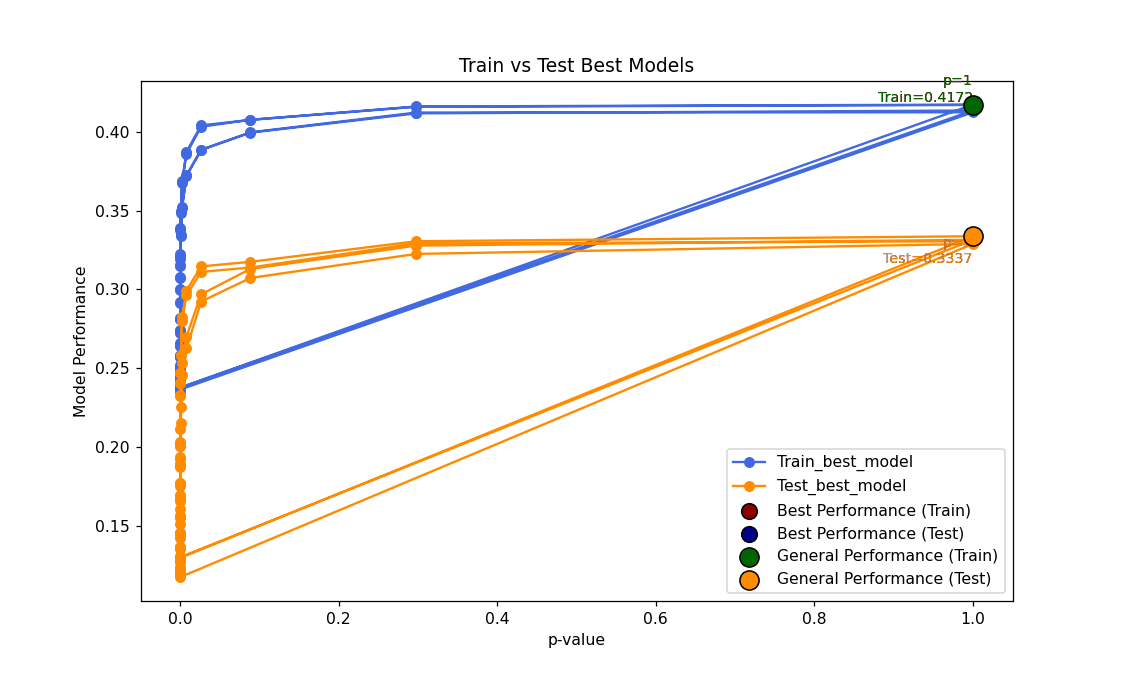

2. Reporting Generalized Performance:

clump_p1                                                          1.0
clump_r2                                                          0.1
clump_kb                                                        200.0
p_window_size                                                   200.0
p_slide_size                                                     50.0
p_LD_threshold                                                   0.25
pvalue                                                            1.0
Test_best_model                                              0.333681
Test_null_model                                              0.123802
Test_pure_prs                                                     0.0
Train_best_model                                             0.417226
Train_null_model                                             0.229794
Train_pure_prs                                                    0.0
l1weight                                           

<IPython.core.display.Javascript object>


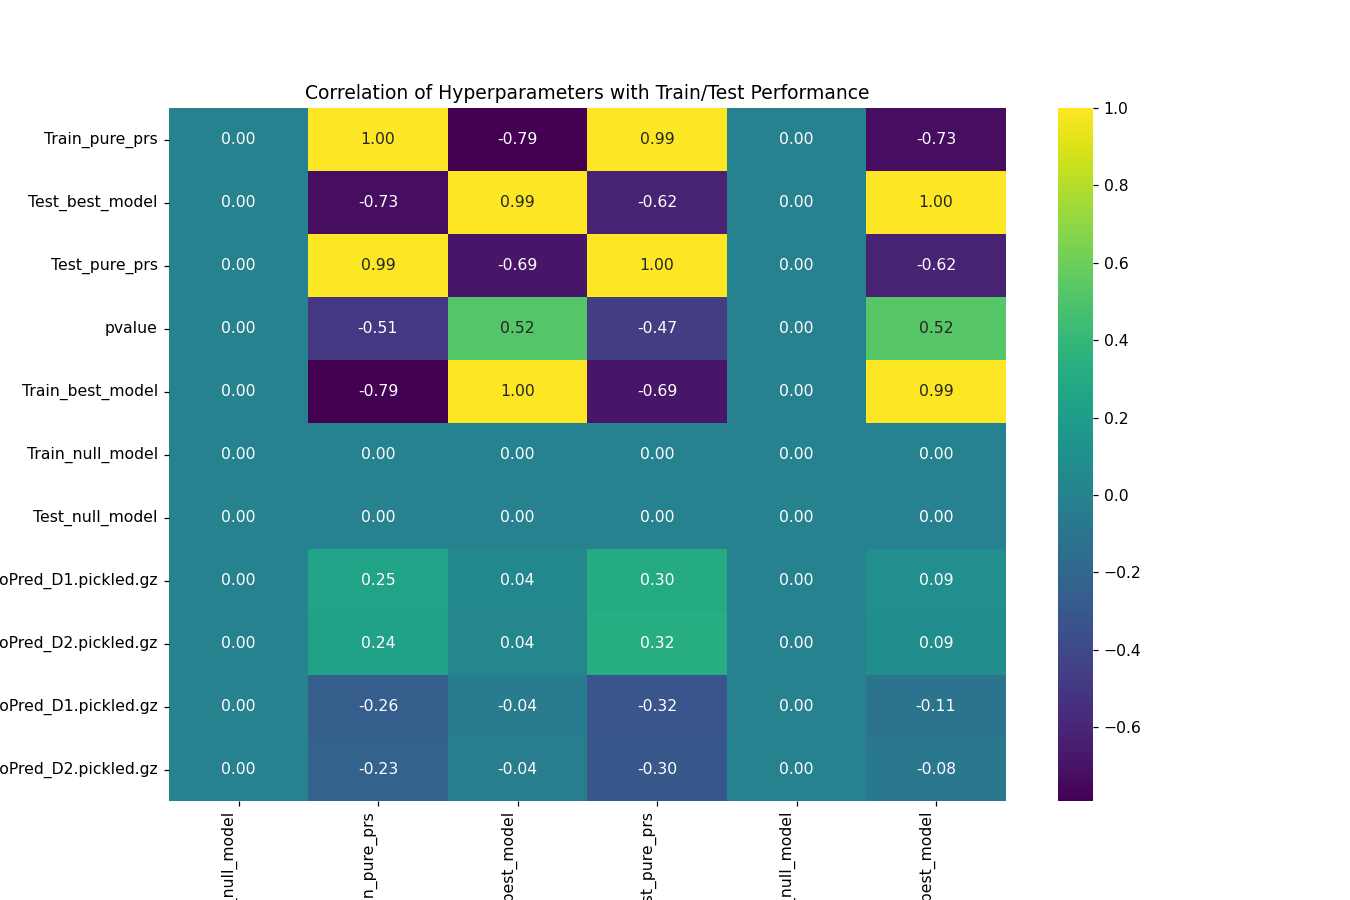

<IPython.core.display.Javascript object>


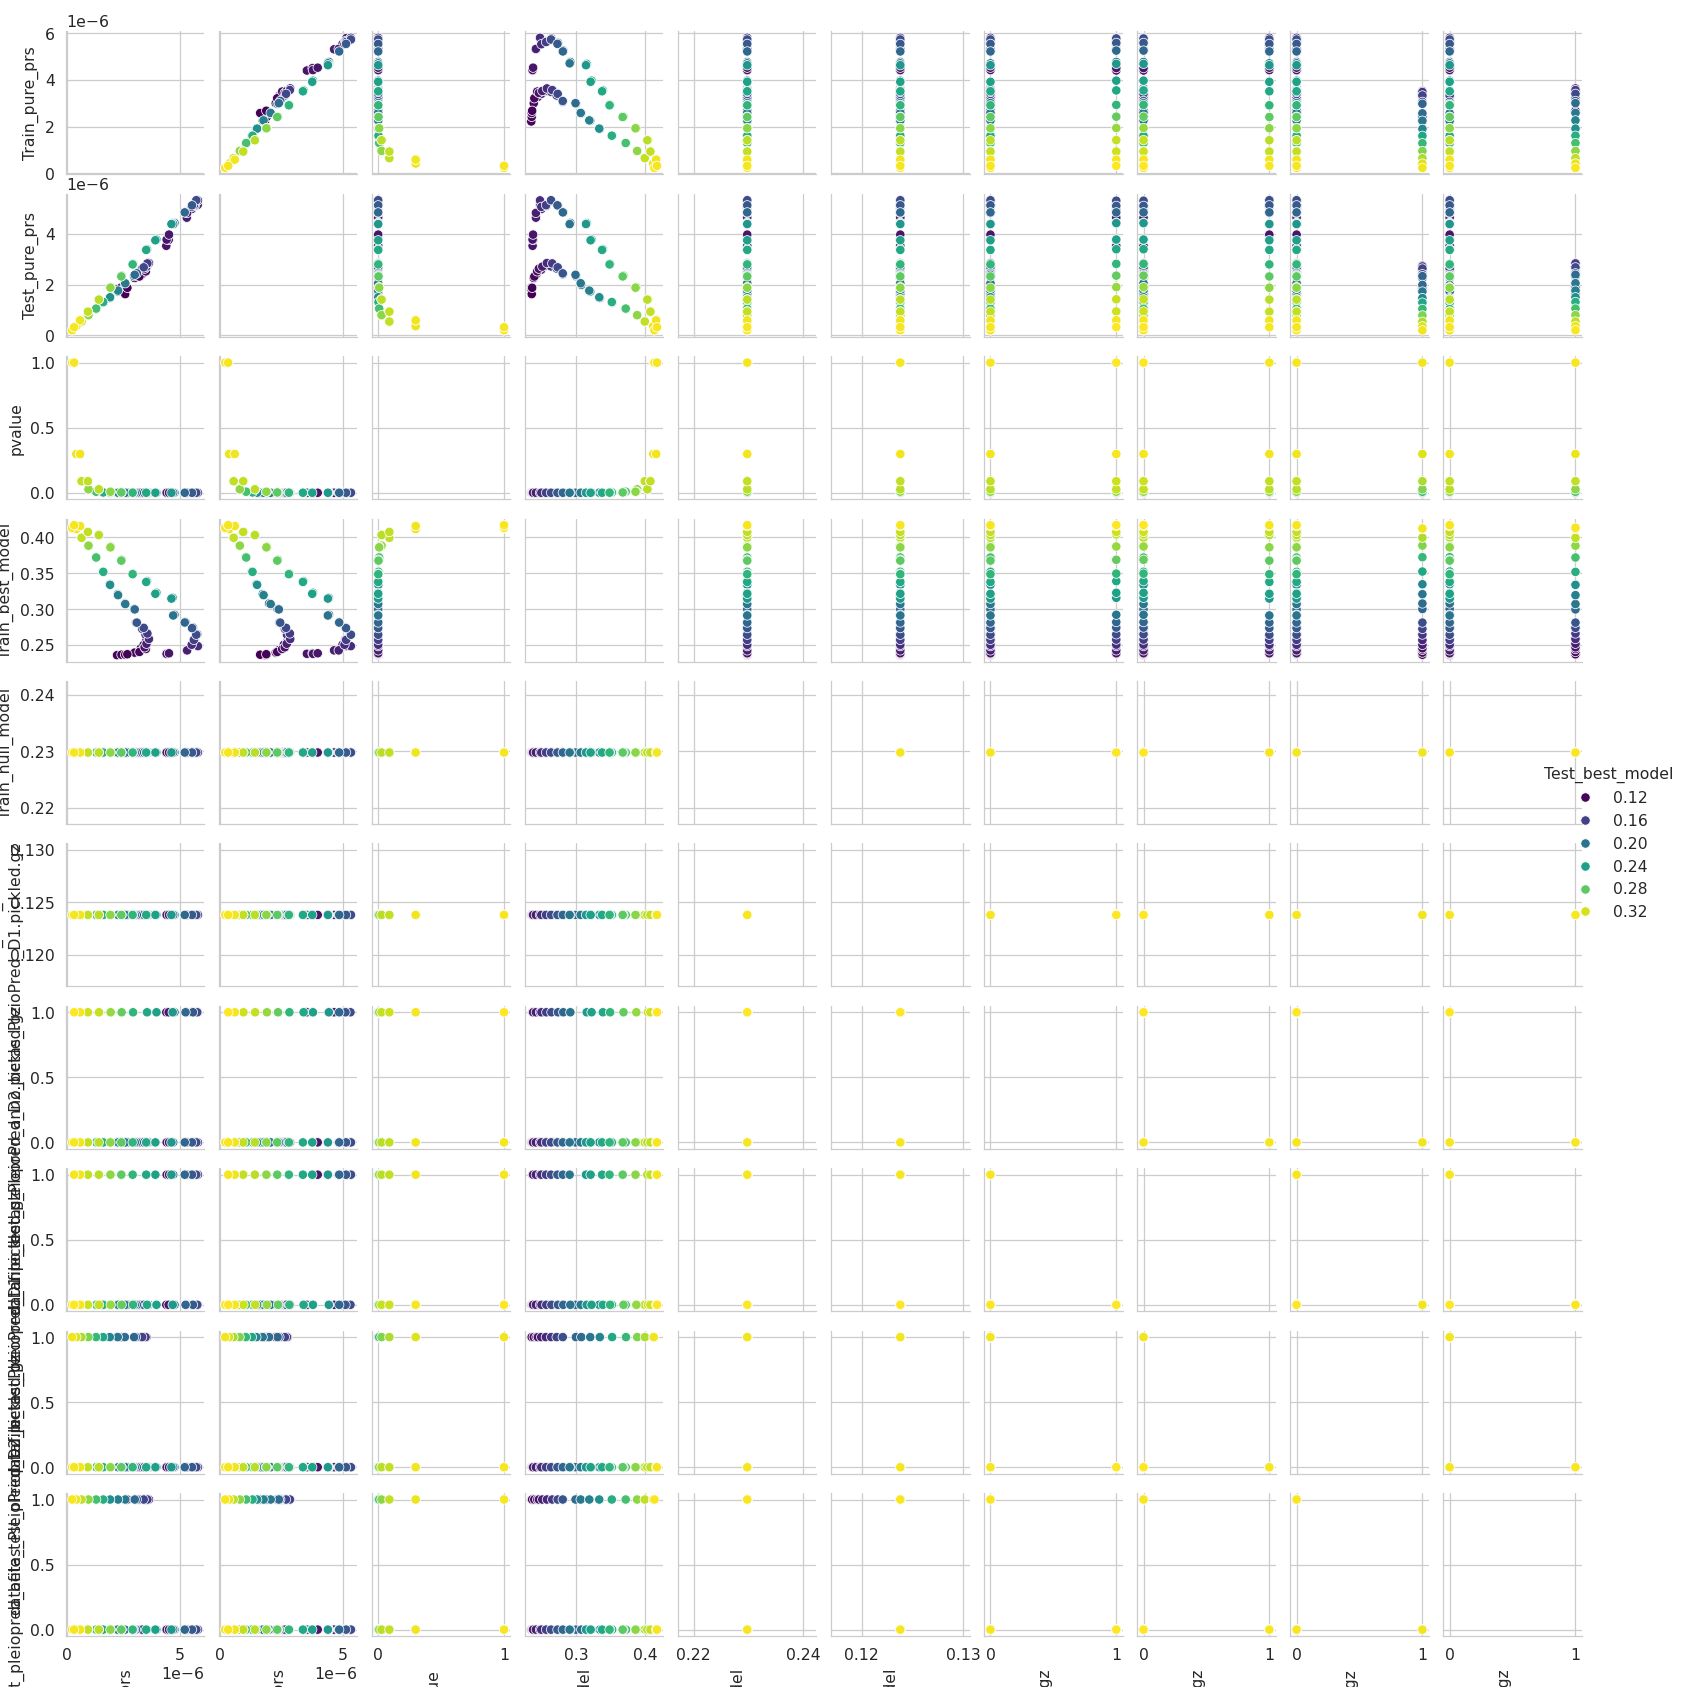

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# In Python 2, use 'plt.ion()' to enable interactive mode
plt.ion()

df = divided_result.sort_values(by='Train_best_model', ascending=False)
print("1. Reporting Based on Best Training Performance:\n")
print(df.iloc[0])

df = divided_result.copy()

# Plot Train and Test best models against p-values
plt.figure(figsize=(10, 6))
plt.plot(df['pvalue'], df['Train_best_model'], label='Train_best_model', marker='o', color='royalblue')
plt.plot(df['pvalue'], df['Test_best_model'], label='Test_best_model', marker='o', color='darkorange')

# Highlight the p-value where both train and test are high
best_index = df[['Train_best_model']].sum(axis=1).idxmax()
best_pvalue = df.loc[best_index, 'pvalue']
best_train = df.loc[best_index, 'Train_best_model']
best_test = df.loc[best_index, 'Test_best_model']

# Use dark colors for the circles
plt.scatter(best_pvalue, best_train, color='darkred', s=100, label='Best Performance (Train)', edgecolor='black', zorder=5)
plt.scatter(best_pvalue, best_test, color='darkblue', s=100, label='Best Performance (Test)', edgecolor='black', zorder=5)

# Annotate the best performance with p-value, train, and test values
plt.text(best_pvalue, best_train, 'p=%0.4g\nTrain=%0.4g' % (best_pvalue, best_train), ha='right', va='bottom', fontsize=9, color='darkred')
plt.text(best_pvalue, best_test, 'p=%0.4g\nTest=%0.4g' % (best_pvalue, best_test), ha='right', va='top', fontsize=9, color='darkblue')

# Calculate Difference and Sum
df['Difference'] = abs(df['Train_best_model'] - df['Test_best_model'])
df['Sum'] = df['Train_best_model'] + df['Test_best_model']

# Sort the DataFrame
sorted_df = df.sort_values(by=['Sum', 'Difference'], ascending=[False, True])

# Highlight the general performance
general_index = sorted_df.index[0]
general_pvalue = sorted_df.loc[general_index, 'pvalue']
general_train = sorted_df.loc[general_index, 'Train_best_model']
general_test = sorted_df.loc[general_index, 'Test_best_model']

plt.scatter(general_pvalue, general_train, color='darkgreen', s=150, label='General Performance (Train)', edgecolor='black', zorder=6)
plt.scatter(general_pvalue, general_test, color='darkorange', s=150, label='General Performance (Test)', edgecolor='black', zorder=6)

# Annotate the general performance with p-value, train, and test values
plt.text(general_pvalue, general_train, 'p=%0.4g\nTrain=%0.4g' % (general_pvalue, general_train), ha='right', va='bottom', fontsize=9, color='darkgreen')
plt.text(general_pvalue, general_test, 'p=%0.4g\nTest=%0.4g' % (general_pvalue, general_test), ha='right', va='top', fontsize=9, color='darkorange')

# Add labels and legend
plt.xlabel('p-value')
plt.ylabel('Model Performance')
plt.title('Train vs Test Best Models')
plt.legend()
plt.show()

print("2. Reporting Generalized Performance:\n")
df = divided_result.copy()
df['Difference'] = abs(df['Train_best_model'] - df['Test_best_model'])
df['Sum'] = df['Train_best_model'] + df['Test_best_model']
sorted_df = df.sort_values(by=['Sum', 'Difference'], ascending=[False, True])
print(sorted_df.iloc[0])

print("3. Reporting the correlation of hyperparameters and the performance of 'Train_null_model', 'Train_pure_prs', 'Train_best_model', 'Test_pure_prs', 'Test_null_model', and 'Test_best_model':\n")

print("3. For string hyperparameters, we used one-hot encoding to find the correlation between string hyperparameters and 'Train_null_model', 'Train_pure_prs', 'Train_best_model', 'Test_pure_prs', 'Test_null_model', and 'Test_best_model'.")

print("3. We performed this analysis for those hyperparameters that have more than one unique value.")

correlation_columns = [
    'Train_null_model', 'Train_pure_prs', 'Train_best_model',
    'Test_pure_prs', 'Test_null_model', 'Test_best_model'
]

hyperparams = [col for col in divided_result.columns if len(divided_result[col].unique()) > 1]
hyperparams = list(set(hyperparams + correlation_columns))

# Separate numeric and string columns
numeric_hyperparams = [col for col in hyperparams if pd.api.types.is_numeric_dtype(divided_result[col])]
string_hyperparams = [col for col in hyperparams if pd.api.types.is_string_dtype(divided_result[col])]

# Encode string columns using one-hot encoding
divided_result_encoded = pd.get_dummies(divided_result, columns=string_hyperparams)

# Combine numeric hyperparams with the new one-hot encoded columns
encoded_columns = [col for col in divided_result_encoded.columns if col.startswith(tuple(string_hyperparams))]
hyperparams = numeric_hyperparams + encoded_columns

# Calculate correlations
correlations = divided_result_encoded[hyperparams].corr()

# Display correlation of hyperparameters with train/test performance columns
hyperparam_correlations = correlations.loc[hyperparams, correlation_columns]
hyperparam_correlations = hyperparam_correlations.fillna(0)

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(hyperparam_correlations, annot=True, cmap='viridis', fmt='.2f', cbar=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Rotate y-axis labels to horizontal
#ax.set_yticklabels(ax.get_yticklabels(), rotation=0, va='center')

plt.title('Correlation of Hyperparameters with Train/Test Performance')
plt.show()

sns.set_style("whitegrid")  # Choose your preferred style
pairplot = sns.pairplot(divided_result_encoded[hyperparams], hue='Test_best_model', palette='viridis')

# Adjust the figure size
pairplot.fig.set_size_inches(15, 15)  # You can adjust the size as needed

for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90, ha='right')  # X-axis labels vertical
    #ax.set_ylabel(ax.get_ylabel(), rotation=0, va='bottom')  # Y-axis labels horizontal

# Show the plot
plt.show()
